C:\Users\PC\AppData\Local\Temp\ipykernel_21048\3807092525.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Epoch 1/100
115/115 - 10s - loss: 0.0662 - val_loss: 0.0807 - 10s/epoch - 84ms/step
Epoch 2/100
115/115 - 1s - loss: 0.0625 - val_loss: 0.0410 - 996ms/epoch - 9ms/step
Epoch 3/100
115/115 - 1s - loss: 0.0615 - val_loss: 0.0418 - 964ms/epoch - 8ms/step
Epoch 4/100
115/115 - 1s - loss: 0.0554 - val_loss: 0.0414 - 951ms/epoch - 8ms/step
Epoch 5/100
115/115 - 1s - loss: 0.0630 - val_loss: 0.0572 - 949ms/epoch - 8ms/step
Epoch 6/100
115/115 - 1s - loss: 0.0664 - val_loss: 0.0388 - 961ms/epoch - 8ms/step
Epoch 7/100
115/115 - 1s - loss: 0.0630 - val_loss: 0.0595 - 936ms/epoch - 8ms/step
Epoch 8/100
115/115 - 1s - loss: 0.0618 - val_loss: 0.0437 - 1s/epoch - 9ms/step
Epoch 9/100
115/115 - 1s - loss: 0.0618 - val_loss: 0.0394 - 948ms/epoch - 8ms/step
Epoch 10/100
115/115 - 1s - loss: 0.0600 - val_loss: 0.0450 - 989ms/epoch - 9ms/step
Epoch 11/100
115/115 - 1s - loss: 0.0594 - val_loss: 0.0391 - 980ms/epoch - 9ms/step
Epoch 12/100
115/115 - 1s - loss: 0.0620 - val_loss: 0.0419 - 986ms/epoch - 9

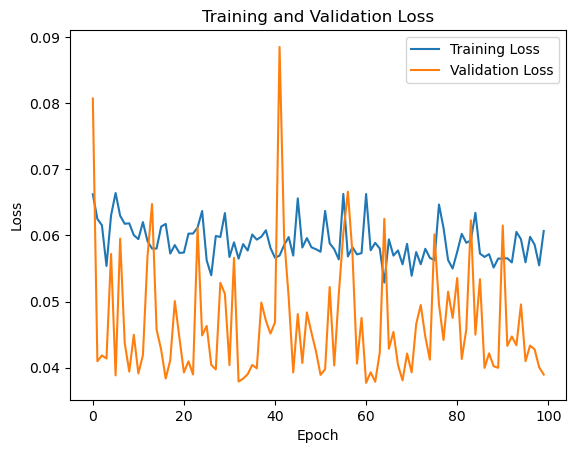

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


df = pd.read_csv('airline.csv')


df['Month'] = pd.to_datetime(df['Month'])
df['Month'] = df['Month'].dt.month
scaler = MinMaxScaler()
df['#Passengers'] = scaler.fit_transform(df['#Passengers'].values.reshape(-1,1))


X = df['Month'].values.reshape(-1, 1)
y = df['#Passengers'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.Dense(1)
])


model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2, validation_data=(X_test, y_test))


loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss}')


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
